In [2]:
%matplotlib inline
import numpy as np
import os

import numpy as np
import matplotlib.pyplot as plt

import time
import scipy
from scipy.misc import imread
from scipy.misc import imresize
from scipy import fftpack
import glob
import cv2

In [6]:
img_folder = '/Users/cesar/Documents/CoxLab/Repos/scene_stimuli/Trim_small'
#img_folder = '/Users/cesar/Documents/CoxLab/Repos/scene_stimuli/Small_interim'
#out_folder = '/Users/cesar/Documents/CoxLab/Repos/scene_stimuli/Lowpass'
out_folder = '/Users/cesar/Documents/CoxLab/Repos/scene_stimuli/Large_interim'
nimgs = len(glob.glob(os.path.join(img_folder,'*')))
img_list = glob.glob(os.path.join(img_folder,'*'))

fft_all = np.zeros((1024,1792))

h1 = np.hamming(1792)
h2 = np.hamming(1024)
ham2d = np.sqrt(np.outer(h2,h1))
img_count = 0
for img_count in range(47,nimgs+1):
#for img_fn in img_list:
    print(img_count)
    img_fn = os.path.join(img_folder,'%i.png'%(img_count))
    print(img_fn)
    im0 = imread(img_fn)
    im1 = cv2.pyrUp(im0)
    im1 = cv2.pyrUp(im1)

    fft0 = np.fft.fftshift(np.fft.fft2(im1*ham2d))
    fft_all = fft_all + abs(fft0)
  #  img_count = img_count +1 
    scipy.misc.imsave(os.path.join(out_folder,'%i.png'%(img_count)),im1)

47
/Users/cesar/Documents/CoxLab/Repos/scene_stimuli/Trim_small/47.png
48
/Users/cesar/Documents/CoxLab/Repos/scene_stimuli/Trim_small/48.png
49
/Users/cesar/Documents/CoxLab/Repos/scene_stimuli/Trim_small/49.png
50
/Users/cesar/Documents/CoxLab/Repos/scene_stimuli/Trim_small/50.png
51
/Users/cesar/Documents/CoxLab/Repos/scene_stimuli/Trim_small/51.png
52
/Users/cesar/Documents/CoxLab/Repos/scene_stimuli/Trim_small/52.png
53
/Users/cesar/Documents/CoxLab/Repos/scene_stimuli/Trim_small/53.png
54
/Users/cesar/Documents/CoxLab/Repos/scene_stimuli/Trim_small/54.png
55
/Users/cesar/Documents/CoxLab/Repos/scene_stimuli/Trim_small/55.png


(1024, 1952)


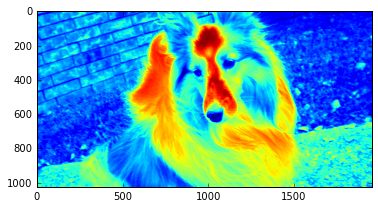

In [4]:
print(im1.shape)
plt.imshow(im1)

In [23]:
img_folder = '/Users/cesar/Documents/CoxLab/Repos/scene_stimuli/Trim_small'
#img_folder = '/Users/cesar/Documents/CoxLab/Repos/scene_stimuli/Small_interim'
#out_folder = '/Users/cesar/Documents/CoxLab/Repos/scene_stimuli/Lowpass'
out_folder = '/Users/cesar/Documents/CoxLab/Repos/scene_stimuli/Large_interim'
nimgs = len(glob.glob(os.path.join(img_folder,'*')))
img_list = glob.glob(os.path.join(img_folder,'*'))

fft_all = np.zeros((1080,1920))

h1 = np.hamming(1920)
h2 = np.hamming(1080)
ham2d = np.sqrt(np.outer(h2,h1))
img_count = 0
#for img_count in range(1,nimgs+1):
for img_fn in img_list:
    print(img_fn)
    #img_fn = os.path.join(img_folder,'%i.png'%(img_count))
    
    im0 = imread(img_fn)
    szy,szx = im0.shape
    resize_factor = 1920/szx

    im1 = imresize(im0,resize_factor,'bilinear')#[8:1088]
#     fft0 = np.fft.fftshift(np.fft.fft2(im1*ham2d))
#     fft_all = fft_all + abs(fft0)
    img_count = img_count +1 
    scipy.misc.imsave(os.path.join(out_folder,'%i.png'%(img_count)),im1)

/Users/cesar/Documents/CoxLab/Repos/scene_stimuli/Trim_small/12.png
/Users/cesar/Documents/CoxLab/Repos/scene_stimuli/Trim_small/14.png
/Users/cesar/Documents/CoxLab/Repos/scene_stimuli/Trim_small/15.png
/Users/cesar/Documents/CoxLab/Repos/scene_stimuli/Trim_small/17.png
/Users/cesar/Documents/CoxLab/Repos/scene_stimuli/Trim_small/19.png
/Users/cesar/Documents/CoxLab/Repos/scene_stimuli/Trim_small/22.png
/Users/cesar/Documents/CoxLab/Repos/scene_stimuli/Trim_small/23.png
/Users/cesar/Documents/CoxLab/Repos/scene_stimuli/Trim_small/25.png
/Users/cesar/Documents/CoxLab/Repos/scene_stimuli/Trim_small/26.png
/Users/cesar/Documents/CoxLab/Repos/scene_stimuli/Trim_small/27.png
/Users/cesar/Documents/CoxLab/Repos/scene_stimuli/Trim_small/29.png
/Users/cesar/Documents/CoxLab/Repos/scene_stimuli/Trim_small/30.png
/Users/cesar/Documents/CoxLab/Repos/scene_stimuli/Trim_small/31.png
/Users/cesar/Documents/CoxLab/Repos/scene_stimuli/Trim_small/32.png
/Users/cesar/Documents/CoxLab/Repos/scene_stimul

IsADirectoryError: [Errno 21] Is a directory: '/Users/cesar/Documents/CoxLab/Repos/scene_stimuli/Trim_small/all'

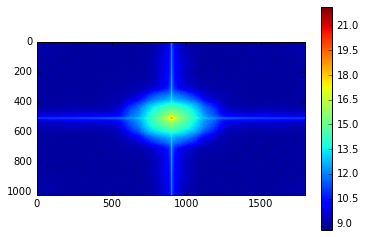

In [23]:

plt.imshow(np.log(fft_all))
plt.colorbar()

In [16]:
#screen res in pixels
szScreenX=1920

#from MWorks
screen_size_x_degrees = 117.5584

deg_per_pixel = screen_size_x_degrees/float(szScreenX)

signal_length= szScreenX
freqs = np.fft.fftfreq(szScreenX, deg_per_pixel)
idx = np.argsort(freqs)

freqs=freqs[idx]

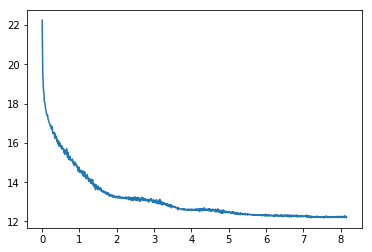

In [17]:
plt.plot(freqs[960:],np.log(fft_all[540,960:]))

In [12]:
img_folder = '/Users/cesar/Documents/CoxLab/Repos/scene_stimuli/LumMatch'
#out_folder = '/Users/cesar/Documents/CoxLab/Repos/scene_stimuli/Lowpass'
out_folder = '/Users/cesar/Documents/CoxLab/Repos/scene_stimuli/Small_interim'
img_list = glob.glob(os.path.join(img_folder,'*'))

In [9]:
print(img_list[45:])

['/Users/cesar/Documents/CoxLab/Repos/scene_stimuli/LumMatch/SHINEd_50.png', '/Users/cesar/Documents/CoxLab/Repos/scene_stimuli/LumMatch/SHINEd_51.png', '/Users/cesar/Documents/CoxLab/Repos/scene_stimuli/LumMatch/SHINEd_52.png', '/Users/cesar/Documents/CoxLab/Repos/scene_stimuli/LumMatch/SHINEd_53.png', '/Users/cesar/Documents/CoxLab/Repos/scene_stimuli/LumMatch/SHINEd_54.png', '/Users/cesar/Documents/CoxLab/Repos/scene_stimuli/LumMatch/SHINEd_55.png', '/Users/cesar/Documents/CoxLab/Repos/scene_stimuli/LumMatch/SHINEd_6.png', '/Users/cesar/Documents/CoxLab/Repos/scene_stimuli/LumMatch/SHINEd_7.png', '/Users/cesar/Documents/CoxLab/Repos/scene_stimuli/LumMatch/SHINEd_8.png', '/Users/cesar/Documents/CoxLab/Repos/scene_stimuli/LumMatch/SHINEd_9.png']


In [13]:


for img_count in range(1,len(img_list)+1):
    img_fn = os.path.join(img_folder,'SHINEd_%i.png'%(img_count))
    print(img_fn)
    
    im0 = imread(img_fn)
    im1 = cv2.pyrDown(im0)
    im1 = cv2.pyrDown(im1)
   
    scipy.misc.imsave(os.path.join(out_folder,'%i.png'%(img_count)),im1)

/Users/cesar/Documents/CoxLab/Repos/scene_stimuli/LumMatch/SHINEd_1.png
/Users/cesar/Documents/CoxLab/Repos/scene_stimuli/LumMatch/SHINEd_2.png
/Users/cesar/Documents/CoxLab/Repos/scene_stimuli/LumMatch/SHINEd_3.png
/Users/cesar/Documents/CoxLab/Repos/scene_stimuli/LumMatch/SHINEd_4.png
/Users/cesar/Documents/CoxLab/Repos/scene_stimuli/LumMatch/SHINEd_5.png
/Users/cesar/Documents/CoxLab/Repos/scene_stimuli/LumMatch/SHINEd_6.png
/Users/cesar/Documents/CoxLab/Repos/scene_stimuli/LumMatch/SHINEd_7.png
/Users/cesar/Documents/CoxLab/Repos/scene_stimuli/LumMatch/SHINEd_8.png
/Users/cesar/Documents/CoxLab/Repos/scene_stimuli/LumMatch/SHINEd_9.png
/Users/cesar/Documents/CoxLab/Repos/scene_stimuli/LumMatch/SHINEd_10.png
/Users/cesar/Documents/CoxLab/Repos/scene_stimuli/LumMatch/SHINEd_11.png
/Users/cesar/Documents/CoxLab/Repos/scene_stimuli/LumMatch/SHINEd_12.png
/Users/cesar/Documents/CoxLab/Repos/scene_stimuli/LumMatch/SHINEd_13.png
/Users/cesar/Documents/CoxLab/Repos/scene_stimuli/LumMatch/S

In [7]:
img_folder = '/Users/cesar/Documents/CoxLab/Repos/scene_stimuli/LumMatch'
out_folder = '/Users/cesar/Documents/CoxLab/Repos/scene_stimuli/Lowpass'

img_list = glob.glob(os.path.join(img_folder,'*'))
for img_count in range(1,len(img_list)+1):
    img_fn = os.path.join(img_folder,'SHINEd_%i.png'%(img_count))
    print(img_fn)
    im0 = imread(img_fn)
   # im1 = im0[:,16:1936]
   
    scipy.misc.imsave(os.path.join(out_folder,'%i.png'%(img_count)),im0)

/Users/cesar/Documents/CoxLab/Repos/scene_stimuli/LumMatch/SHINEd_1.png
/Users/cesar/Documents/CoxLab/Repos/scene_stimuli/LumMatch/SHINEd_2.png
/Users/cesar/Documents/CoxLab/Repos/scene_stimuli/LumMatch/SHINEd_3.png
/Users/cesar/Documents/CoxLab/Repos/scene_stimuli/LumMatch/SHINEd_4.png
/Users/cesar/Documents/CoxLab/Repos/scene_stimuli/LumMatch/SHINEd_5.png
/Users/cesar/Documents/CoxLab/Repos/scene_stimuli/LumMatch/SHINEd_6.png
/Users/cesar/Documents/CoxLab/Repos/scene_stimuli/LumMatch/SHINEd_7.png
/Users/cesar/Documents/CoxLab/Repos/scene_stimuli/LumMatch/SHINEd_8.png
/Users/cesar/Documents/CoxLab/Repos/scene_stimuli/LumMatch/SHINEd_9.png
/Users/cesar/Documents/CoxLab/Repos/scene_stimuli/LumMatch/SHINEd_10.png
/Users/cesar/Documents/CoxLab/Repos/scene_stimuli/LumMatch/SHINEd_11.png
/Users/cesar/Documents/CoxLab/Repos/scene_stimuli/LumMatch/SHINEd_12.png
/Users/cesar/Documents/CoxLab/Repos/scene_stimuli/LumMatch/SHINEd_13.png
/Users/cesar/Documents/CoxLab/Repos/scene_stimuli/LumMatch/S

In [4]:
# img_folder = '/Users/cesar/Documents/CoxLab/Repos/scene_stimuli/MagMatch'
# out_folder = '/Users/cesar/Documents/CoxLab/Repos/scene_stimuli/MagMatch/5x3_small'
img_folder = '/Users/cesar/Documents/CoxLab/Repos/scene_stimuli/TexMatch'
out_folder = '/Users/cesar/Documents/CoxLab/Repos/scene_stimuli/TexMatch/5x3_small'

for img_count in range(1,55+1):
    img_fn = os.path.join(img_folder,'%i'%(img_count),'256x448_s5x3_o0.5_iter_50.png')
    
    im0 = imread(img_fn)
   
    scipy.misc.imsave(os.path.join(out_folder,'%i.png'%(img_count)),im0)

In [6]:
# img_folder = '/Users/cesar/Documents/CoxLab/Repos/scene_stimuli/MagMatch/5x3_small'
# out_folder = '/Users/cesar/Documents/CoxLab/Repos/scene_stimuli/MagMatch/5x3_large'
img_folder = '/Users/cesar/Documents/CoxLab/Repos/scene_stimuli/TexMatch/5x3_small'
out_folder = '/Users/cesar/Documents/CoxLab/Repos/scene_stimuli/TexMatch/5x3_large'

for img_count in range(1,55+1):
    img_fn = os.path.join(img_folder,'%i.png'%(img_count))
    
    im0 = imread(img_fn)
    im1 = cv2.pyrUp(im0)
    im1 = cv2.pyrUp(im1)
   
    scipy.misc.imsave(os.path.join(out_folder,'%i.png'%(img_count)),im1)

In [16]:
1952-1920

32

In [21]:
img_folder = '/Users/cesar/Documents/CoxLab/Repos/scene_stimuli/Trim_small'
out_folder = '/Users/cesar/Documents/CoxLab/Repos/scene_stimuli/tmp'

img_list = glob.glob(os.path.join(img_folder,'*'))
for img_count in range(1,len(img_list)+1):
    img_fn = os.path.join(img_folder,'%i.png'%(img_count))
    
    im0 = imread(img_fn)
    im1 = im0[:,20:468]
   
    scipy.misc.imsave(os.path.join(out_folder,'%i.png'%(img_count)),im1)

In [19]:
488-448

40